***Name: SADDAM HUSSAIN***

***REG ID: GO_STP_6834***

---



---



# Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle.

# Link: https://www.kaggle.com/giripujar/hr-analytics

# First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['salary'].nunique()

3

# Data Visualization

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Correlation 
corr = df.corr()

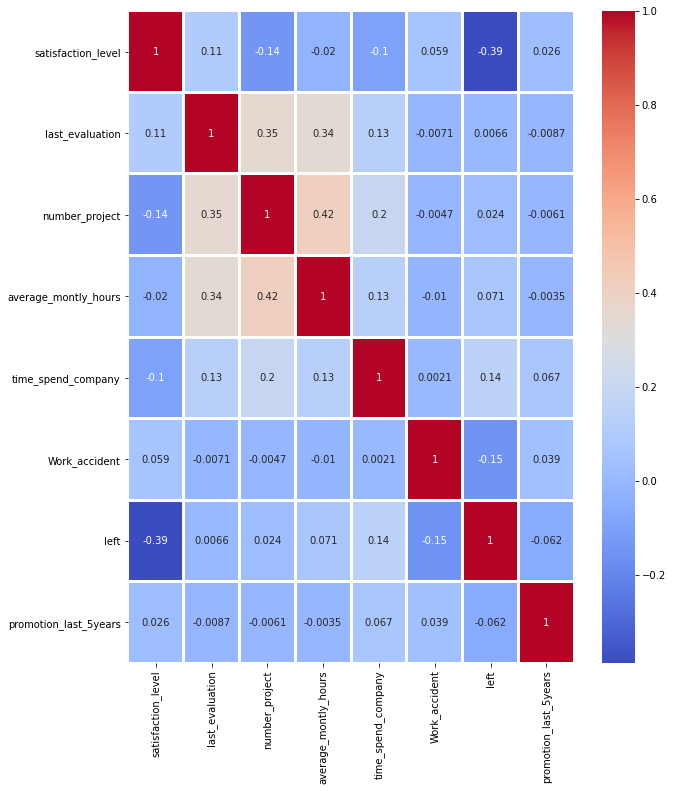

In [ ]:
plt.figure(figsize = (10,12)) 
sns.heatmap(corr,cmap = 'coolwarm', linewidths=2, annot=True)

plt.show()

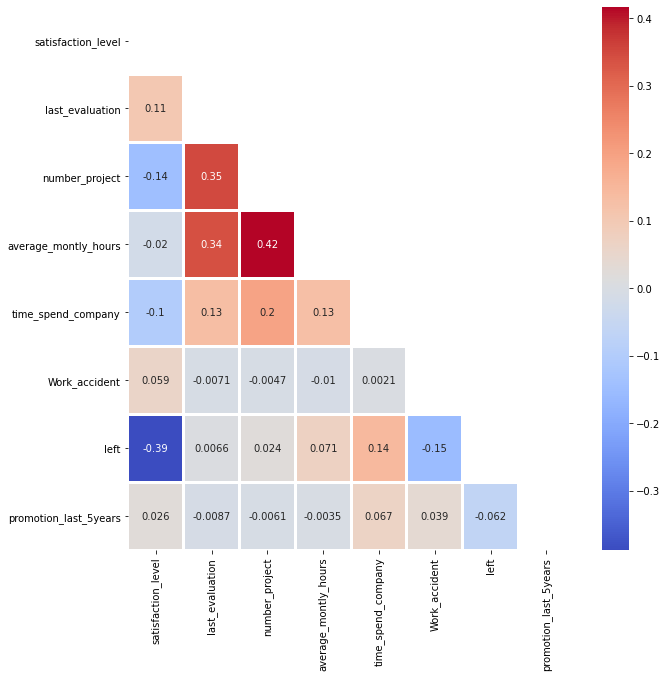

In [ ]:
# To get only the half part of heat map

newMatrix = np.triu(corr)

#To get upper half use tril
plt.figure(figsize = (10,10)) 
sns.heatmap(corr,cmap = 'coolwarm', linewidths=2, annot=True, mask = newMatrix)

plt.show()

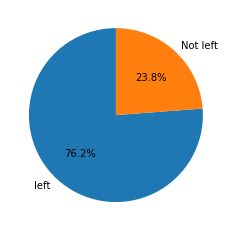

In [ ]:

empleft = df.groupby('left').count().salary

plt.pie(empleft, labels=['left', 'Not left'],startangle=90, autopct="%.1f%%", explode = [0.5]*2)

plt.show()

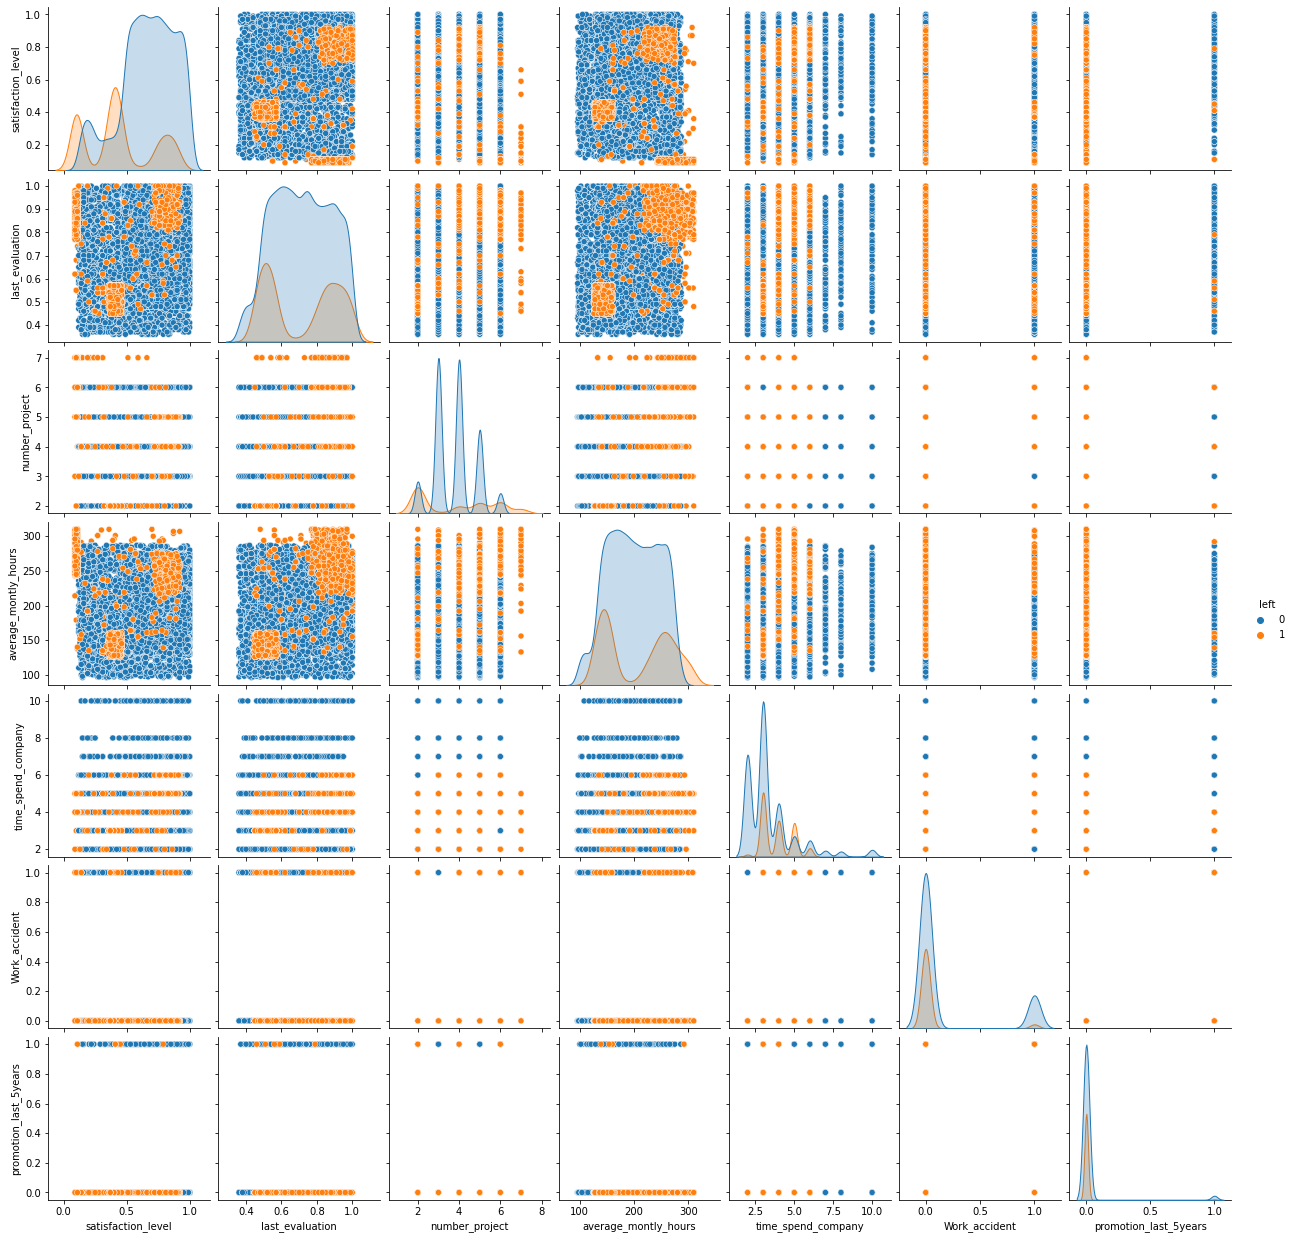

In [ ]:
sns.pairplot(df, hue='left')

plt.show()

In [ ]:
# Department comparision those who left

department = df[df.left == 1].groupby('Department')

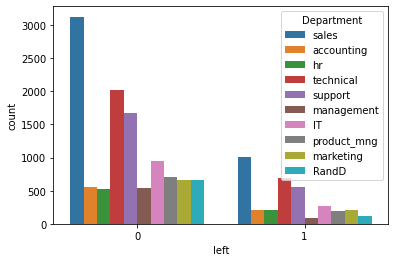

In [ ]:
sns.countplot(x = 'left',hue = 'Department', data = df)

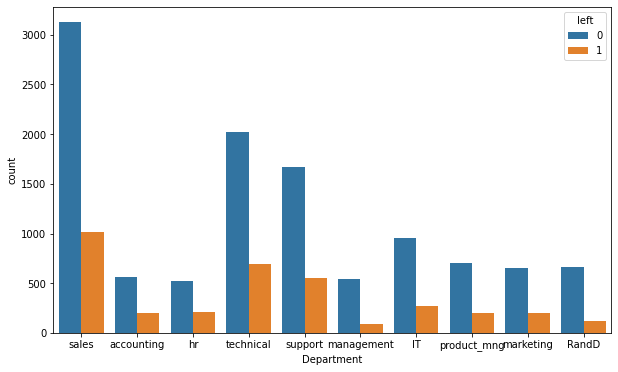

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Department',hue = 'left', data = df)

plt.show()

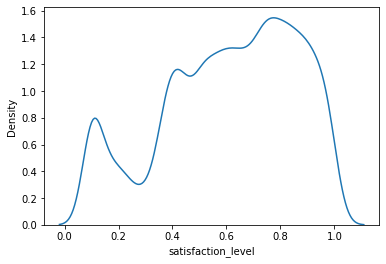

In [ ]:
sns.kdeplot(df.satisfaction_level)

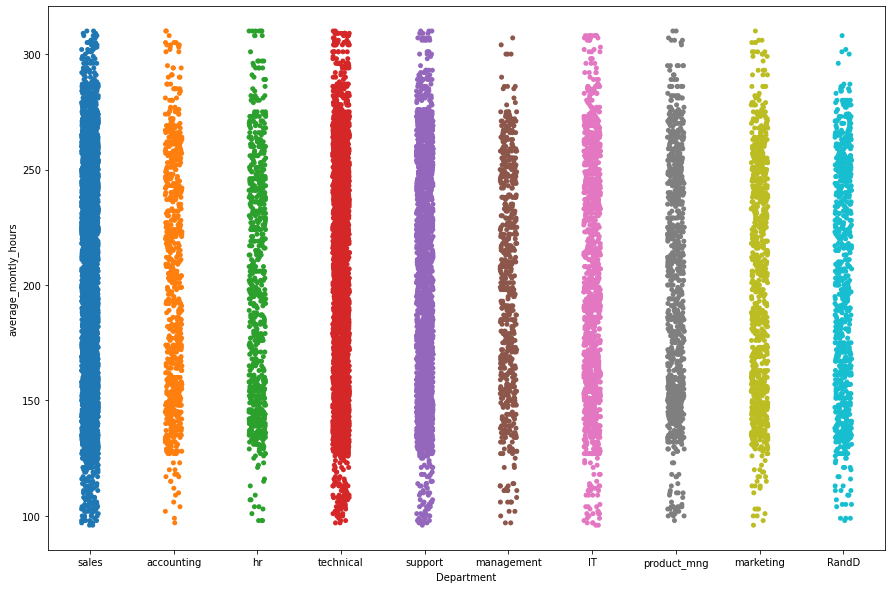

In [ ]:
plt.figure(figsize = (15,10))
sns.stripplot(x = 'Department', y = 'average_montly_hours', data = df)

plt.show()

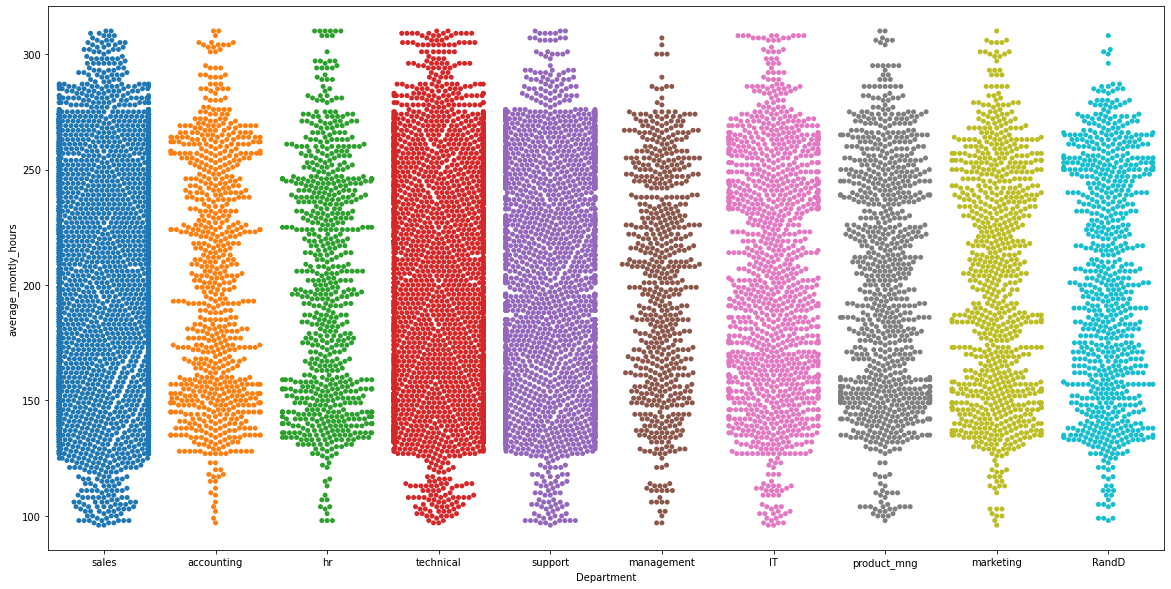

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (20,10))
sns.swarmplot(x = 'Department', y = 'average_montly_hours', data = df)

plt.show()

# Data Conversion for categorical data

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#Label Encoding for Salary column
df.salary = le.fit_transform(df.salary)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [ ]:
# Target Encoding for the Department column

targ_en_mean_Val = df.groupby('Department')['left'].mean()
df = df.merge(targ_en_mean_Val, how = 'left', on = 'Department')
df.drop('Department', axis = 1, inplace = True)
df = df.rename(columns = {'left_x': 'left', 'left_y': 'Department'})

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department
0,0.38,0.53,2,157,3,0,1,0,1,0.244928
1,0.80,0.86,5,262,6,0,1,0,2,0.244928
2,0.11,0.88,7,272,4,0,1,0,2,0.244928
3,0.72,0.87,5,223,5,0,1,0,1,0.244928
4,0.37,0.52,2,159,3,0,1,0,1,0.244928


# Data Split

In [ ]:
X = df.drop('left', axis = 1)
y = df['left']

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department
0,0.38,0.53,2,157,3,0,0,1,0.244928
1,0.80,0.86,5,262,6,0,0,2,0.244928
2,0.11,0.88,7,272,4,0,0,2,0.244928
3,0.72,0.87,5,223,5,0,0,1,0.244928
4,0.37,0.52,2,159,3,0,0,1,0.244928


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
model = lr.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
y_test

[0 0 0 ... 0 1 0]


6723     0
6473     0
4679     0
862      1
7286     0
        ..
10371    0
12541    1
2656     0
6759     0
13564    0
Name: left, Length: 3750, dtype: int64

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2620,  233],
       [ 683,  214]])

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7557333333333334
